# Health Insurance Cost Prediction

### This project is carried out to predict the cost of the health insurance of the person based on the past data available such as age, gender, BMI, smoking habits, family detais etc.


### The same data is used to predict and propose the insurance price for the person based on details provided.

In [634]:
# Importing the python libraries

In [635]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [636]:
# Creating a raw dataset.
df_raw = pd.read_excel('/content/Health_insurance_cost.xlsx')

In [637]:
# Taking a copy of raw dataset.
df = df_raw.copy()

In [638]:
# To check the first 5 entries in the dataset.
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [639]:
# To check the last 5 entries in the dataset.
df.tail()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1333,50.0,male,30.97,3,no,northwest,10600.5483
1334,18.0,female,31.92,0,no,northeast,2205.9808
1335,18.0,female,36.85,0,no,southeast,1629.8335
1336,21.0,female,25.80,0,no,southwest,2007.9450
1337,61.0,female,29.07,0,yes,northwest,29141.3603


In [640]:
df.shape # to check the shape of data set i.e. rows and columns.

(1338, 7)

In [641]:
# Print the number of columns and rows.
print("No of rows: ", df.shape[0])
print("No of columns: ", df.shape[1])

No of rows:  1338
No of columns:  7


In [642]:
df.dtypes # To check the datatype of each columns

age                       float64
gender                     object
BMI                       float64
Children                    int64
smoking_status             object
location                   object
health_insurance_price    float64
dtype: object

In [643]:
df.columns # To check the column data

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [644]:
df.info() # To check the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [645]:
# Let's check for the unique values in our data

df.nunique()

age                         47
gender                       2
BMI                        545
Children                     6
smoking_status               2
location                     4
health_insurance_price    1335
dtype: int64

In [646]:
# To check the null entries in the dataset.
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [647]:
# To check the null entries in the dataset.
df.isna().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

There are missong values in the data set.

28 in age, 23 in BMI and 2 in insurance price. 

In [648]:
# To check the % of null entries in the dataset.
percent_missing = df.isnull().sum()*100/len(df)
percent_missing

age                       2.092676
gender                    0.000000
BMI                       1.718984
Children                  0.000000
smoking_status            0.000000
location                  0.000000
health_insurance_price    0.149477
dtype: float64

### We will replace the missing values with median, mode since the missing value count is less that 2% in the entire data set.

<Axes: >

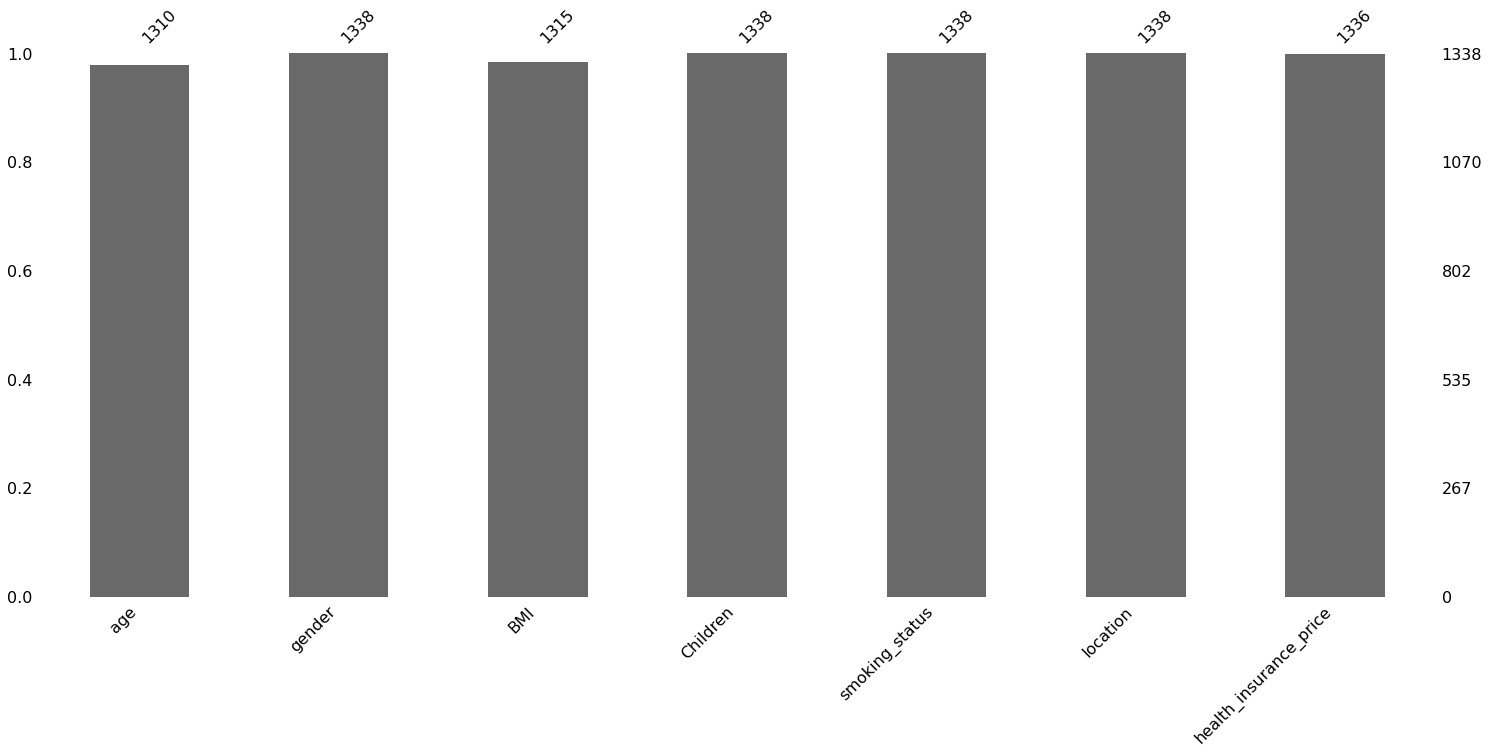

In [649]:
# msno.bar is a simple visualization of null values by column:

msno.bar(df.sample(1338))

<Axes: >

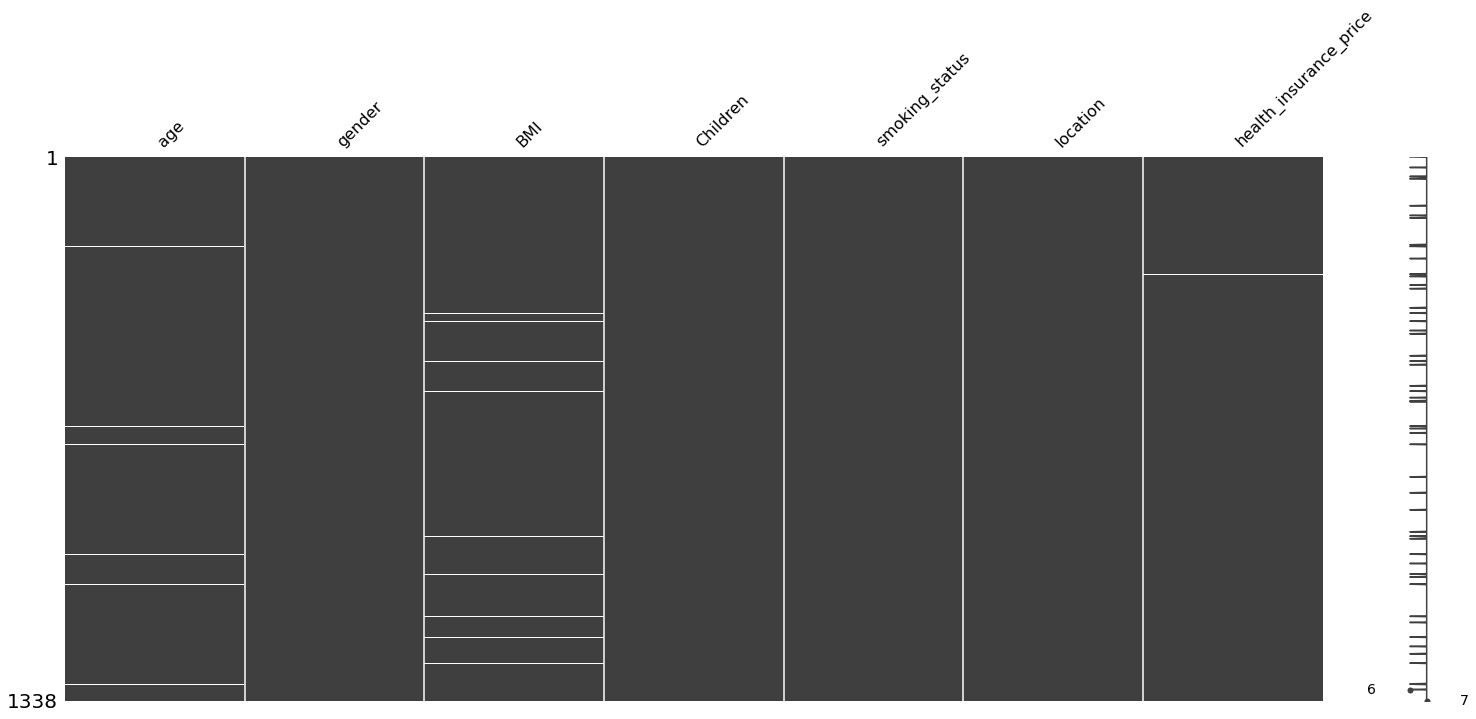

In [650]:
sorted = df.sort_values('gender')
msno.matrix(sorted)

### Handling missing values in numerical columns using the median values.

In [651]:
# Median values for columns age, BMI, health_insurance_price.
median1 = df["age"].median()
median2 = df["BMI"].median()
median3 = df["health_insurance_price"].median()
print(median1)
print(median2)
print(median3)

39.0
30.305
9382.033


In [652]:
df.head() # Checking the data set for updates

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [653]:
df[['age','BMI','health_insurance_price']].dtypes # Checking the data set for updates

age                       float64
BMI                       float64
health_insurance_price    float64
dtype: object

In [654]:
# Replacing the missng values using median values.
# for putting the value we use inplace

df["age"].replace(np.NaN,median1,inplace=True)
df["BMI"].replace(np.NaN,median2,inplace=True)
df["health_insurance_price"].replace(np.NaN,median3,inplace=True)

In [655]:
df.isnull().sum() # Checking the data set for updates.

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [656]:
df.info() # Checking the data set for updates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1338 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1338 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [657]:
df.describe() # Checking the data set for updates

,age,BMI,Children,health_insurance_price
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.162930,30.632489,1.094918,13262.718310
std,13.907443,6.057672,1.205493,12104.666613
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4746.521225
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.430000,2.000000,16584.318157
max,64.000000,53.130000,5.000000,63770.428010


In [658]:
df.describe(include = 'all') # Checking the data set for updates

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.162930,NaN,30.632489,1.094918,NaN,NaN,13262.718310
std,13.907443,NaN,6.057672,1.205493,NaN,NaN,12104.666613
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.315000,0.000000,NaN,NaN,4746.521225
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.430000,2.000000,NaN,NaN,16584.318157


In [659]:
# Let's check for the unique values in our data

df.nunique()

age                         47
gender                       2
BMI                        545
Children                     6
smoking_status               2
location                     4
health_insurance_price    1336
dtype: int64

In [660]:
df['location'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: location, dtype: int64

In [661]:
df.head(10)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.305,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
5,31.0,female,25.740,0,no,southeast,3756.62160
6,46.0,female,33.440,1,no,southeast,8240.58960
7,37.0,female,27.740,3,no,northwest,7281.50560
8,37.0,male,29.830,2,no,northeast,6406.41070
9,60.0,female,25.840,0,no,northwest,28923.13692


In [662]:
# Checking the duplicate values.
duplicate = df.duplicated()
print(duplicate.sum())

1


In [663]:
df['gender'].unique() # Checking the unique data in dataset

array(['female', 'male'], dtype=object)

In [664]:
# Converting the categorical data to numerical data using map / replace function.
df['gender'] = df['gender'].replace({'female' : 0, 'male' : 1})

In [665]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,30.305,0,yes,southwest,16884.92400
1,18.0,1,33.770,1,no,southeast,1725.55230
2,28.0,1,33.000,3,no,southeast,4449.46200
3,33.0,1,22.705,0,no,northwest,21984.47061
4,32.0,1,28.880,0,no,northwest,3866.85520


In [666]:
# Converting the categorical data to numerical data using map / replace function.
df['smoking_status'] = df['smoking_status'].replace({'no' : 0, 'yes' : 1})

In [667]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,30.305,0,1,southwest,16884.92400
1,18.0,1,33.770,1,0,southeast,1725.55230
2,28.0,1,33.000,3,0,southeast,4449.46200
3,33.0,1,22.705,0,0,northwest,21984.47061
4,32.0,1,28.880,0,0,northwest,3866.85520


In [668]:
# Converting the categorical data to numerical data using map / replace function.
df['location'] = df['location'].map({'southwest' : 1, 'southeast' : 2,'northwest':3,'northeast': 4})

In [669]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,30.305,0,1,1,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,3,21984.47061
4,32.0,1,28.880,0,0,3,3866.85520


### Model Building for Machine Learning Algorithms.

In [670]:
# Checking the DV and IDV columns
df.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [671]:
X = df.drop("health_insurance_price", axis = 1)

In [672]:
Y = df["health_insurance_price"]

In [673]:
print(X.head())

    age  gender     BMI  Children  smoking_status  location
0  19.0       0  30.305         0               1         1
1  18.0       1  33.770         1               0         2
2  28.0       1  33.000         3               0         2
3  33.0       1  22.705         0               0         3
4  32.0       1  28.880         0               0         3


In [674]:
print(Y.head())

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: health_insurance_price, dtype: float64


### Train / Test Split of Data:
1. Split the data into training and test data
2. Train the model on training data
3. Test the model on test data.

In [675]:
# import sklearn library
from sklearn.model_selection import train_test_split

In [676]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [677]:
X_train

,age,gender,BMI,Children,smoking_status,location
560,46.0,0,19.950,2,0,3
1285,47.0,0,24.320,0,0,4
1142,52.0,0,24.860,0,0,2
969,39.0,0,34.320,5,0,2
486,54.0,0,21.470,3,0,3
...,...,...,...,...,...,...
1095,18.0,0,31.350,4,0,4
1130,39.0,0,23.870,5,0,2
1294,58.0,1,25.175,0,0,4
860,37.0,0,47.600,2,1,1


In [678]:
X_test

,age,gender,BMI,Children,smoking_status,location
764,45.0,0,25.175,2,0,4
887,36.0,0,30.020,0,0,3
890,64.0,0,26.885,0,1,3
1293,46.0,1,25.745,3,0,3
259,39.0,1,31.920,0,1,3
...,...,...,...,...,...,...
109,63.0,1,35.090,0,1,2
575,58.0,0,27.170,0,0,3
535,38.0,1,28.025,1,0,4
543,54.0,0,47.410,0,1,2


In [679]:
Y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: health_insurance_price, Length: 1070, dtype: float64

In [680]:
Y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: health_insurance_price, Length: 268, dtype: float64

### Importing the Regression Models from sklearn library

In [681]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

# Model Training:

# 1. Linear Regression

In [682]:
LR = LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

In [683]:
LR.fit(X_train,Y_train)

LinearRegression()

In [684]:
# prediction on Training data
LR_tn_pred = LR.predict(X_train)

In [685]:
# R squared Error: Goodness of fit
LR_score_train = metrics.r2_score(Y_train, LR_tn_pred)
print("R squared Error : ", LR_score_train)

R squared Error :  0.733247059225965


In [686]:
# prediction on Training data
LR_ts_pred = LR.predict(X_test)

In [687]:
# R squared Error: Goodness of fit
LR_score_test = metrics.r2_score(Y_test, LR_ts_pred)
print("R squared Error : ", LR_score_test)

R squared Error :  0.7762723519584974


# 2. Lasso Regression

In [688]:
# loading the lasso regression model
LS = Lasso()

In [689]:
LS.fit(X_train,Y_train)

Lasso()

In [690]:
# prediction on Training data
LS_tn_pred = LS.predict(X_train)

In [691]:
# R squared Error: Goodness of fit
LS_score_train = metrics.r2_score(Y_train, LS_tn_pred)
print("R squared Error : ", LS_score_train)

R squared Error :  0.7332469840823054


In [692]:
# prediction on Test data
LR_ts_pred = LS.predict(X_test)

In [693]:
# R squared Error: Goodness of fit
LS_score_test = metrics.r2_score(Y_test, LR_ts_pred)
print("R squared Error : ", LS_score_test)

R squared Error :  0.7762598376532877


# 3. Decision Tree Regressor

In [694]:
# loading the SVR model
DTR = DecisionTreeRegressor(criterion = "squared_error", max_depth=2, min_samples_split=10 )

In [695]:
DTR.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=2, min_samples_split=10)

In [696]:
# prediction on Training data
DTR_tn_predict = DTR.predict(X_train)

In [697]:
# R squared Error: Goodness of fit
DTR_score_train = metrics.r2_score(Y_train, DTR_tn_predict)
print("R squared Error : ", DTR_score_train)

R squared Error :  0.8081787131651106


In [698]:
# prediction on Test data
DTR_ts_predict = LS.predict(X_test)

In [699]:
# R squared Error: Goodness of fit
DTR_score_test = metrics.r2_score(Y_test, DTR_ts_predict)
print("R squared Error : ", DTR_score_test)

R squared Error :  0.7762598376532877


# 4. Random Forest Regressor

In [700]:
# loading the Random Forest Regressor model
RFR = RandomForestRegressor(n_estimators=50, max_depth=4)

In [701]:
RFR.fit(X_train,Y_train)

RandomForestRegressor(max_depth=4, n_estimators=50)

In [702]:
# prediction on Training data
RFR_tn_predict = RFR.predict(X_train)

In [703]:
# R squared Error: Goodness of fit
RFR_score_train = metrics.r2_score(Y_train, RFR_tn_predict)
print("R squared Error : ", RFR_score_train)

R squared Error :  0.8645894071192639


In [704]:
# prediction on Test data
RFR_ts_predict = RFR.predict(X_test)

In [705]:
# R squared Error: Goodness of fit
RFR_score_test = metrics.r2_score(Y_test, RFR_ts_predict)
print("R squared Error : ", RFR_score_test)

R squared Error :  0.862777488975619


# 5. Gradient Boosting Regressor

In [706]:
# loading the Random Forest Regressor model
GBR = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3)

In [707]:
GBR.fit(X_train,Y_train)

GradientBoostingRegressor(n_estimators=50)

In [708]:
# prediction on Training data
GBR_tn_predict = GBR.predict(X_train)

In [709]:
# R squared Error: Goodness of fit
GBR_score_train = metrics.r2_score(Y_train, GBR_tn_predict)
print("R squared Error : ", GBR_score_train)

R squared Error :  0.8746832409816225


In [710]:
# prediction on Test data
GBR_ts_predict = GBR.predict(X_test)

In [711]:
# R squared Error: Goodness of fit
GBR_score_test = metrics.r2_score(Y_test, GBR_ts_predict)
print("R squared Error : ", GBR_score_test)

R squared Error :  0.8653684239981738


In [712]:
y_pred1 = LR.predict(X_test)
y_pred2 = LS.predict(X_test)
y_pred3 = DTR.predict(X_test)
y_pred4 = RFR.predict(X_test)
y_pred5 = GBR.predict(X_test)

In [713]:
df_pred = pd.DataFrame({"Actual": Y_test, 'LR': y_pred1, 'LS': y_pred2, 'DTR': y_pred3, 'RFR': y_pred4, 'GBR': y_pred5})

In [714]:
df_pred.sample(10)

,Actual,LR,LS,DTR,RFR,GBR
128,32734.18630,26411.147438,26408.094655,20978.938609,17474.882917,16140.734056
567,7256.72310,9454.731460,9453.190600,5874.233708,8125.676718,8982.851551
615,42969.85270,35812.125736,35809.500184,41134.679571,44610.405810,44514.823069
254,41097.16175,35089.128785,35082.103374,41134.679571,44352.769588,42314.575224
1322,12981.34570,16410.408802,16410.314479,12517.226523,14279.224147,14397.295813
901,48673.55880,40122.437736,40116.497691,41134.679571,45984.904146,46435.944609
1293,9301.89355,9530.533866,9528.544787,12517.226523,9864.053481,9881.983868
44,6079.67150,10691.110847,10689.135975,5874.233708,7662.594705,7658.354821
259,33750.29180,32065.841074,32059.711402,41134.679571,41854.517670,40593.864714
538,8233.09750,9175.946203,9179.480923,12517.226523,9207.353491,9443.398742


In [715]:
## Mean Absolute Error: Lower the value better is the model fit.

MAE_1 = metrics.mean_absolute_error(Y_test, y_pred1)
MAE_2 = metrics.mean_absolute_error(Y_test, y_pred2)
MAE_3 = metrics.mean_absolute_error(Y_test, y_pred3)
MAE_4 = metrics.mean_absolute_error(Y_test, y_pred4)
MAE_5 = metrics.mean_absolute_error(Y_test, y_pred5)

In [716]:
print(MAE_1,MAE_2,MAE_3,MAE_4,MAE_5)

4221.158799686948 4221.609845354986 3381.100319282211 2729.611821570399 2659.960535975889


# Prediction on Random Data of the Person

In [717]:
# Lets take a random data for prediction

data = {"age": 45, "gender": 0, "BMI": 15, "Children": 1, "smoking_status": 1, "location": 3}
data

{'age': 45,
 'gender': 0,
 'BMI': 15,
 'Children': 1,
 'smoking_status': 1,
 'location': 3}

In [718]:
df_new = pd.DataFrame(data, index = [0])
df_new

,age,gender,BMI,Children,smoking_status,location
0,45,0,15,1,1,3


In [719]:
## Predict health_insurance_price on above data using the best fit model from the above study. 
## Gradient Boosting Regressor gives the best results on the train and testing data set, hence it will be used for future predictions.

new_pred = GBR.predict(df_new)
new_pred

array([20130.73108342])

In [720]:
print("The Health Insurance Cost for the person will be: ", round(float(new_pred), 2),"/-")

The Health Insurance Cost for the person will be:  20130.73 /-


In [722]:
################################################################################ End of the Report #####################################################################################